# Sonar Dataset - Rock vs Mine Prediction

Before looking at the data it is always useful to import the most common/used libraries for a Data Science project

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score, plot_confusion_matrix, make_scorer

In [3]:
df = pd.read_csv('sonar.all-data.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape



(208, 61)

Only by looking at the shape of the data, you already see that there are 60 features influencing our prediction wheter our sonar data yields a Mine or a rock, but there are only 208 classified cases we can use for our learning algorithm. Therefore we definitly should consider stratification by splitting our data into training/test data. For a real usecase we should also consider to gather more data. But let's see later how our different classification algorithms deal with it.

In [5]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
column_names = []

for i in range(61):
    column_names.append(f'Feature {i}')
    
df.columns = column_names
df.rename(columns={'Feature 60': 'Rock/Mine'}, inplace=True)
df.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Rock/Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
df.iloc[:,-1].unique()

array(['R', 'M'], dtype=object)

In [10]:
df = df.replace(to_replace='R', value=0, regex=True)
df = df.replace(to_replace='M', value=1, regex=True)
df.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Rock/Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


<AxesSubplot:>

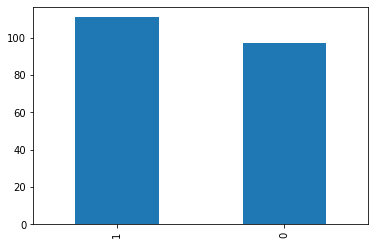

In [11]:
df['Rock/Mine'].value_counts().plot(kind='bar')

More or less equal distribution of Mines and Rocks in our target column, but due to the low amount of entries in our dataset we should consider stratification.

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.2, random_state = 42, stratify = y)

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

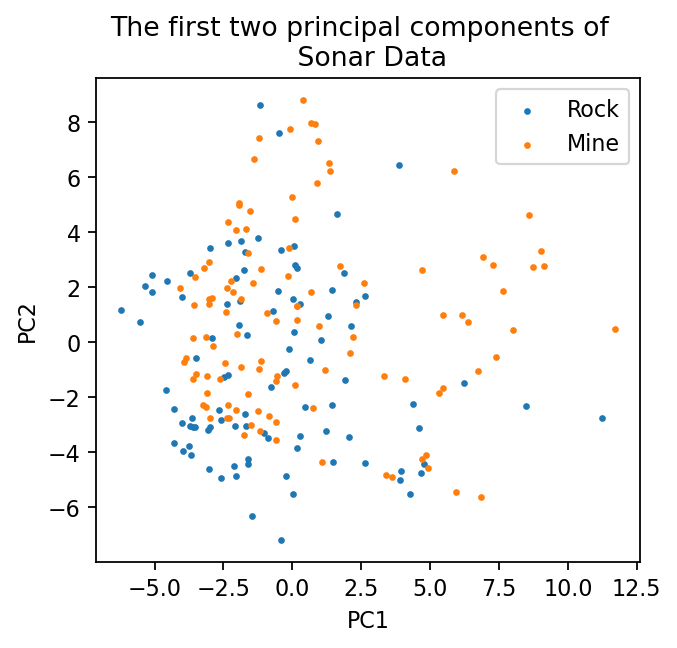

In [13]:
pca = PCA(n_components = 2).fit_transform(x)


plt.figure(dpi=160)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=1, label='Rock', s=4)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=1, label='Mine', s=4)
plt.legend()
plt.title('The first two principal components of  \n Sonar Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [14]:
pca = PCA(n_components=2)
pca.fit(x)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.singular_values_)

[12.26690952 11.39310436]
[0.20346557 0.18897216]
[0.20346557 0.39243773]
[50.39097409 48.56307859]


# Testing the different classification algorithms

## 1. K-nearest neighbors (KNN) 

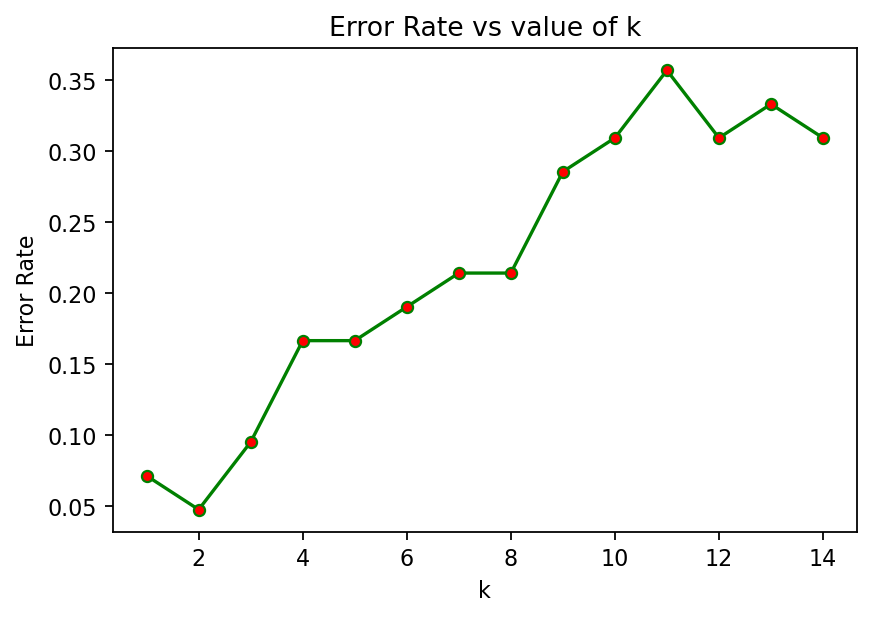

CPU times: user 504 ms, sys: 188 ms, total: 691 ms
Wall time: 150 ms


In [15]:
%%time

error = []
scores = []

for j in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = j)
    knn.fit(X_train, Y_train)
    pred_j = knn.predict(X_test)
    error.append(np.mean(pred_j != Y_test))
    scores.append(knn.score(X_test, Y_test))
    
plt.figure(dpi=160)
plt.plot(range(1,15), error, color = 'green', linestyle = '-', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.title('Error Rate vs value of k')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

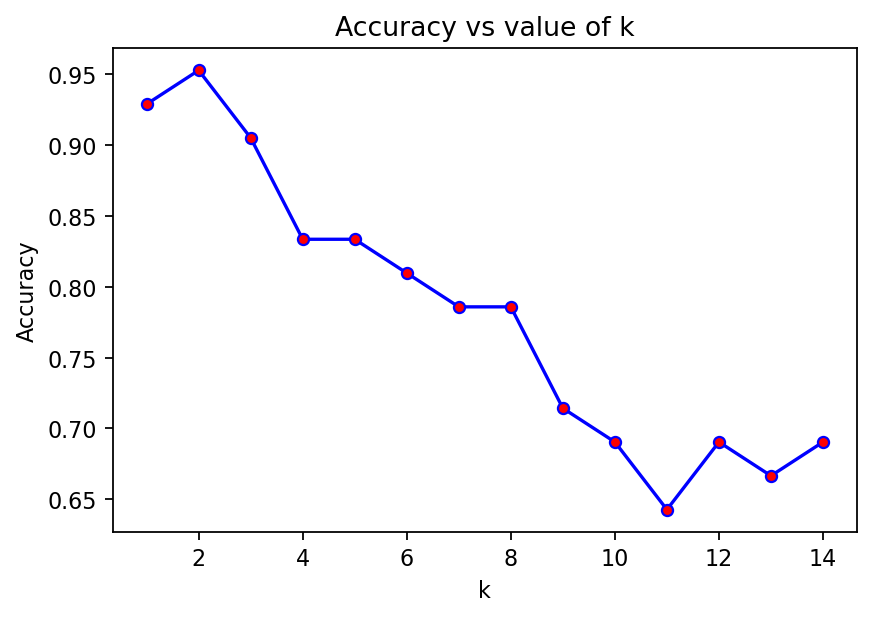

In [16]:
plt.figure(dpi=160)
plt.plot(range(1,15), scores, color = 'blue', linestyle = '-', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.title('Accuracy vs value of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

training score: 0.8675
test score: 0.8333
[[17  3]
 [ 4 18]]


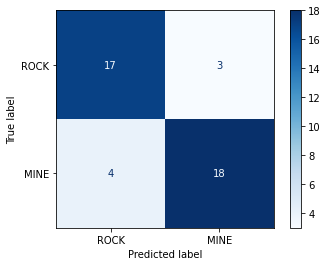

In [17]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print('training score: {:.4f}'.format(knn.score(X_train, Y_train)))
print('test score: {:.4f}'.format(knn.score(X_test, Y_test)))

disp = plot_confusion_matrix(knn, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 0.9157
test score: 0.8333
[[16  4]
 [ 3 19]]


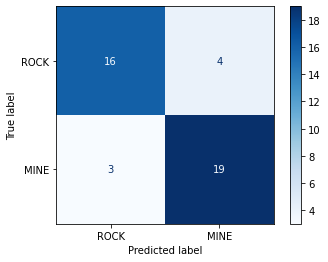

In [18]:
#With Scaling
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print('training score: {:.4f}'.format(knn.score(x_train, y_train)))
print('test score: {:.4f}'.format(knn.score(x_test, y_test)))

disp = plot_confusion_matrix(knn, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

Text(0, 0.5, 'Accuracy')

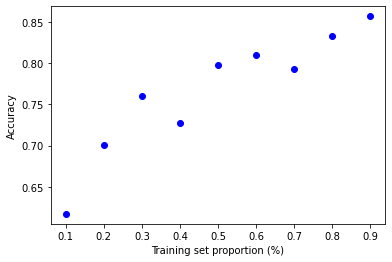

In [19]:
#How test size influences the accuracy of the model

size = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

plt.figure()

for m in size:
    score = []
    for j in range(1,50):
        X0_train, X0_test, Y0_train, Y0_test = train_test_split(x, y, test_size = 1-m, random_state = 42, stratify = y)
        knn.fit(X0_train, Y0_train)
        score.append(knn.score(X0_test, Y0_test))
    plt.plot(m, np.mean(score), 'bo')
    
plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy')

In [20]:
#Summary

print('k-nearest neighbors (KNN)')
print('k=2')

#print(confusion_matrix(Y_test, knn.predict(X_test)))


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, knn_pred, target_names=target_names))

print('--'*30)
knn_accuracy = (accuracy_score(y_test, knn_pred))
print('Accuracy=', knn_accuracy, '%')

k-nearest neighbors (KNN)
k=2
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.84      0.80      0.82        20
        Mine       0.83      0.86      0.84        22

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42

------------------------------------------------------------
Accuracy= 0.8333333333333334 %


## 2. Logistic Regression

training score: 0.8253
test score: 0.8095
[[15  5]
 [ 3 19]]


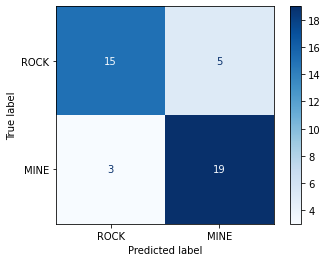

In [21]:
lreg = LogisticRegression()
lreg.fit(X_train, Y_train)
Y_pred = lreg.predict(X_test)

print('training score: {:.4f}'.format(lreg.score(X_train, Y_train)))
print('test score: {:.4f}'.format(lreg.score(X_test, Y_test)))

disp = plot_confusion_matrix(lreg, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 0.9337
test score: 0.8095
[[16  4]
 [ 4 18]]


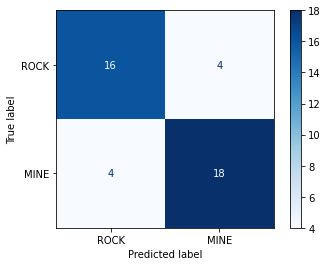

In [22]:
lreg.fit(x_train, y_train)
lreg_pred = lreg.predict(x_test)

print('training score: {:.4f}'.format(lreg.score(x_train, y_train)))
print('test score: {:.4f}'.format(lreg.score(x_test, y_test)))

disp = plot_confusion_matrix(lreg, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [23]:
#Summary

print('Logistic Regression (LR)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, lreg_pred, target_names=target_names))

print('--'*30)
logreg_accuracy = (accuracy_score(y_test, lreg_pred))
print('Accuracy=', logreg_accuracy, '%')

Logistic Regression (LR)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.80      0.80      0.80        20
        Mine       0.82      0.82      0.82        22

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42

------------------------------------------------------------
Accuracy= 0.8095238095238095 %


## 3. (Gaussian) Naives Bayes 

training score: 0.7410
test score: 0.7381
[[16  4]
 [ 7 15]]


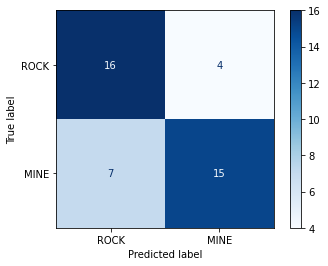

In [24]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred = nb.predict(X_test)

print('training score: {:.4f}'.format(nb.score(X_train, Y_train)))
print('test score: {:.4f}'.format(nb.score(X_test, Y_test)))

disp = plot_confusion_matrix(nb, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 0.7410
test score: 0.7381
[[16  4]
 [ 7 15]]


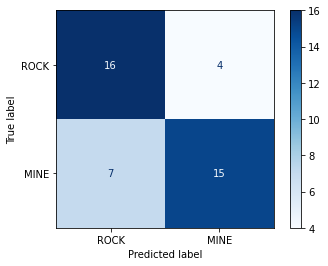

In [25]:
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

print('training score: {:.4f}'.format(nb.score(x_train, y_train)))
print('test score: {:.4f}'.format(nb.score(x_test, y_test)))

disp = plot_confusion_matrix(nb, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [26]:
#Summary

print('Gaussian Naive Bayes (NB)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, nb_pred, target_names=target_names))

print('--'*30)
nb_accuracy = (accuracy_score(y_test, nb_pred))
print('Accuracy=', nb_accuracy, '%')

Gaussian Naive Bayes (NB)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.70      0.80      0.74        20
        Mine       0.79      0.68      0.73        22

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42

------------------------------------------------------------
Accuracy= 0.7380952380952381 %


## 4. (Linear) Support Vector Classifier (SVC) 

training score: 0.8494
test score: 0.8333
[[14  6]
 [ 1 21]]


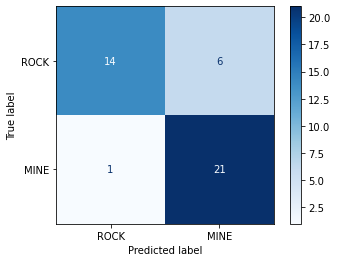

In [27]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

print('training score: {:.4f}'.format(svc.score(X_train, Y_train)))
print('test score: {:.4f}'.format(svc.score(X_test, Y_test)))

disp = plot_confusion_matrix(svc, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 0.9699
test score: 0.8810
[[17  3]
 [ 2 20]]


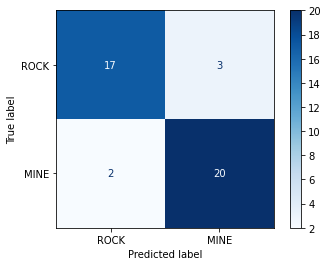

In [28]:
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

print('training score: {:.4f}'.format(svc.score(x_train, y_train)))
print('test score: {:.4f}'.format(svc.score(x_test, y_test)))

disp = plot_confusion_matrix(svc, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 0.9699
test score: 0.8810
[[17  3]
 [ 2 20]]


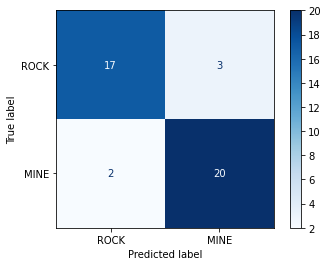

In [29]:
svc_1 = SVC(kernel="linear", C=0.025,probability=True)
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)

print('training score: {:.4f}'.format(svc.score(x_train, y_train)))
print('test score: {:.4f}'.format(svc.score(x_test, y_test)))

disp = plot_confusion_matrix(svc, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 0.9699
test score: 0.8810
[[17  3]
 [ 2 20]]


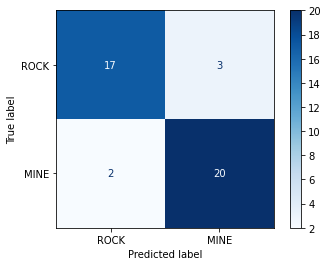

In [30]:
svc_2 = LinearSVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)

print('training score: {:.4f}'.format(svc.score(x_train, y_train)))
print('test score: {:.4f}'.format(svc.score(x_test, y_test)))

disp = plot_confusion_matrix(svc, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

Mathematically, optimizing an SVM is a convex optimization problem, usually with a unique minimizer. This means that there is only one solution to this mathematical optimization problem.

The differences in results come from several aspects: SVC and LinearSVC are supposed to optimize the same problem, but in fact all liblinear estimators penalize the intercept, whereas libsvm ones don't (IIRC). This leads to a different mathematical optimization problem and thus different results. There may also be other subtle differences such as scaling and default loss function (edit: make sure you set loss='hinge' in LinearSVC). Next, in multiclass classification, liblinear does one-vs-rest by default whereas libsvm does one-vs-one.

SGDClassifier(loss='hinge') is different from the other two in the sense that it uses stochastic gradient descent and not exact gradient descent and may not converge to the same solution. However the obtained solution may generalize better.

Between SVC and LinearSVC, one important decision criterion is that LinearSVC tends to be faster to converge the larger the number of samples is. This is due to the fact that the linear kernel is a special case, which is optimized for in Liblinear, but not in Libsvm.


In [31]:
#Summary

print('Support Vector Classifier (SVC)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, svc_pred, target_names=target_names))

print('--'*30)
svc_accuracy = (accuracy_score(y_test, svc_pred))
print('Accuracy=', svc_accuracy, '%')

Support Vector Classifier (SVC)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.89      0.85      0.87        20
        Mine       0.87      0.91      0.89        22

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

------------------------------------------------------------
Accuracy= 0.8809523809523809 %


## 5. Decision Tree

training score: 1.0000
test score: 0.7857
[[14  6]
 [ 3 19]]


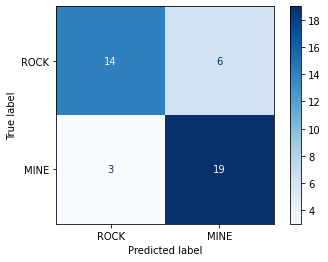

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

print('training score: {:.4f}'.format(dt.score(X_train, Y_train)))
print('test score: {:.4f}'.format(dt.score(X_test, Y_test)))

disp = plot_confusion_matrix(dt, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.8333
[[14  6]
 [ 1 21]]


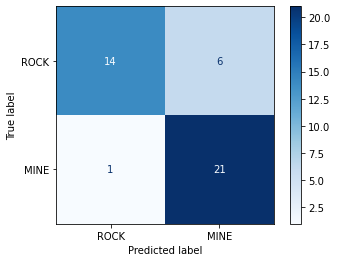

In [33]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

print('training score: {:.4f}'.format(dt.score(x_train, y_train)))
print('test score: {:.4f}'.format(dt.score(x_test, y_test)))

disp = plot_confusion_matrix(dt, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.8095
[[16  4]
 [ 4 18]]


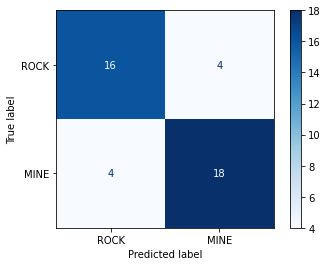

In [34]:
dt2 = DecisionTreeClassifier(max_depth=10)
dt2.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print('training score: {:.4f}'.format(dt2.score(x_train, y_train)))
print('test score: {:.4f}'.format(dt2.score(x_test, y_test)))

disp = plot_confusion_matrix(dt2, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [35]:
imp_name = X_train.columns
sorted(zip(map(lambda x: round(x,4), dt.feature_importances_), imp_name), reverse=True)[:17]

[(0.2903, 'Feature 10'),
 (0.0899, 'Feature 3'),
 (0.0894, 'Feature 15'),
 (0.0729, 'Feature 20'),
 (0.0634, 'Feature 44'),
 (0.0577, 'Feature 30'),
 (0.0539, 'Feature 47'),
 (0.0529, 'Feature 8'),
 (0.0413, 'Feature 27'),
 (0.0372, 'Feature 41'),
 (0.0363, 'Feature 14'),
 (0.0285, 'Feature 52'),
 (0.0238, 'Feature 19'),
 (0.0237, 'Feature 43'),
 (0.0226, 'Feature 28'),
 (0.0161, 'Feature 29'),
 (0.0, 'Feature 9')]

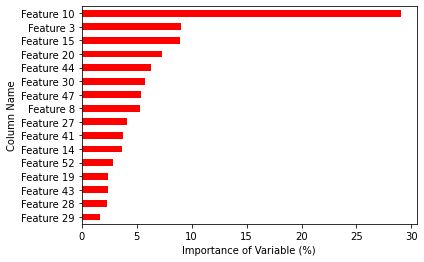

In [36]:
Importance = pd.DataFrame({'Importance': dt.feature_importances_*100}, index=X_train.columns)

Importance_nonzero = Importance[(Importance.T !=0).any()]
Importance_nonzero.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')


plt.xlabel('Importance of Variable (%)')
plt.ylabel('Column Name')
plt.gca().legend_ = None

In [37]:
#Summary

print('Decision Tree (DT)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, dt_pred, target_names=target_names))

print('--'*30)
dt_accuracy = (accuracy_score(y_test, dt_pred))
print('Accuracy=', dt_accuracy, '%')

Decision Tree (DT)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.93      0.70      0.80        20
        Mine       0.78      0.95      0.86        22

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42

------------------------------------------------------------
Accuracy= 0.8333333333333334 %


## 6. Random Forest

training score: 1.0000
test score: 0.8810
[[16  4]
 [ 1 21]]


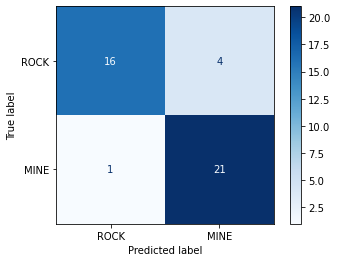

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

print('training score: {:.4f}'.format(rf.score(X_train, Y_train)))
print('test score: {:.4f}'.format(rf.score(X_test, Y_test)))

disp = plot_confusion_matrix(rf, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.8810
[[17  3]
 [ 2 20]]


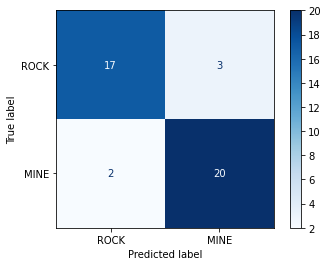

In [39]:
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

print('training score: {:.4f}'.format(rf.score(x_train, y_train)))
print('test score: {:.4f}'.format(rf.score(x_test, y_test)))

disp = plot_confusion_matrix(rf, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.8571
[[17  3]
 [ 3 19]]


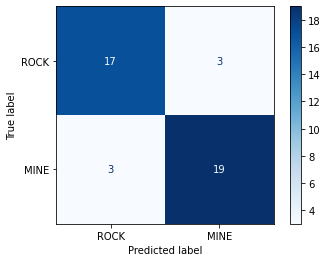

In [40]:
rfc = RandomForestClassifier(n_estimators = 250,n_jobs=-1)
rfc.fit(x_train, y_train)
y_pred_rfc = rf.predict(x_test)

print('training score: {:.4f}'.format(rfc.score(x_train, y_train)))
print('test score: {:.4f}'.format(rfc.score(x_test, y_test)))

disp = plot_confusion_matrix(rfc, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [41]:
sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), imp_name), reverse=True)[:30]

[(0.0605, 'Feature 10'),
 (0.0519, 'Feature 11'),
 (0.0465, 'Feature 47'),
 (0.0429, 'Feature 9'),
 (0.041, 'Feature 8'),
 (0.0347, 'Feature 48'),
 (0.0278, 'Feature 4'),
 (0.0256, 'Feature 3'),
 (0.0253, 'Feature 46'),
 (0.0246, 'Feature 35'),
 (0.0242, 'Feature 12'),
 (0.0239, 'Feature 36'),
 (0.0232, 'Feature 45'),
 (0.023, 'Feature 50'),
 (0.0217, 'Feature 0'),
 (0.0206, 'Feature 15'),
 (0.0205, 'Feature 7'),
 (0.0197, 'Feature 51'),
 (0.0181, 'Feature 13'),
 (0.0162, 'Feature 29'),
 (0.0161, 'Feature 27'),
 (0.016, 'Feature 19'),
 (0.0158, 'Feature 5'),
 (0.0155, 'Feature 44'),
 (0.0152, 'Feature 26'),
 (0.0151, 'Feature 32'),
 (0.0151, 'Feature 20'),
 (0.0147, 'Feature 16'),
 (0.0145, 'Feature 58'),
 (0.0133, 'Feature 43')]

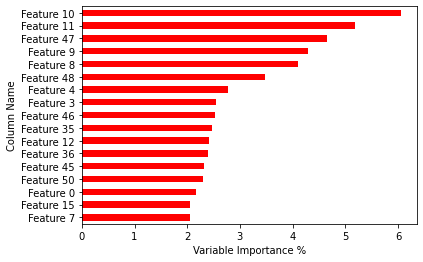

In [42]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100},
                         index = X_train.columns)

#only features with more than 2% importance
Importance_mostly = Importance[(Importance.T >= 2).any()]
Importance_mostly.sort_values(by ='Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'r')

plt.xlabel('Variable Importance %')
plt.ylabel("Column Name")
plt.gca().legend_ = None

In [43]:
#Summary

print('Random Forest (RF)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, rf_pred, target_names=target_names))

print('--'*30)
rf_accuracy = (accuracy_score(y_test, rf_pred))
print('Accuracy=', rf_accuracy, '%')

Random Forest (RF)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.89      0.85      0.87        20
        Mine       0.87      0.91      0.89        22

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

------------------------------------------------------------
Accuracy= 0.8809523809523809 %


## 7. Neural Network (Multilayer Perceptron Classifier)

training score: 1.0000
test score: 0.9286
[[18  2]
 [ 1 21]]


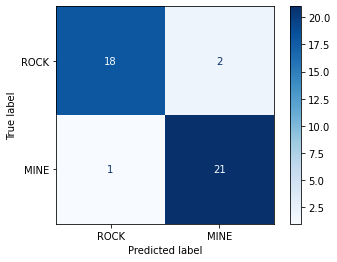

In [44]:
mlp = MLPClassifier(random_state=1, max_iter=3000)
mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)

print('training score: {:.4f}'.format(mlp.score(X_train, Y_train)))
print('test score: {:.4f}'.format(mlp.score(X_test, Y_test)))

disp = plot_confusion_matrix(mlp, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.9048
[[18  2]
 [ 2 20]]


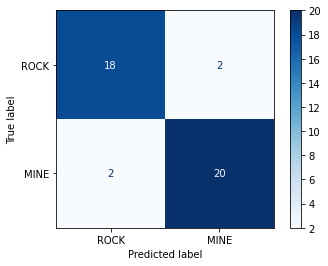

In [45]:
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)

print('training score: {:.4f}'.format(mlp.score(x_train, y_train)))
print('test score: {:.4f}'.format(mlp.score(x_test, y_test)))

disp = plot_confusion_matrix(mlp, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [46]:
#Summary

print('Multilayer Perceptron (MLP)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, mlp_pred, target_names=target_names))

print('--'*30)
mlp_accuracy = (accuracy_score(y_test, mlp_pred))
print('Accuracy=', mlp_accuracy, '%')

Multilayer Perceptron (MLP)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.90      0.90      0.90        20
        Mine       0.91      0.91      0.91        22

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42

------------------------------------------------------------
Accuracy= 0.9047619047619048 %


## 8. AdaBoost

training score: 1.0000
test score: 0.8333
[[17  3]
 [ 4 18]]


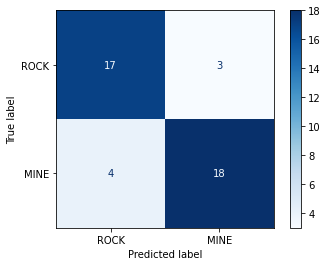

In [47]:
ab = AdaBoostClassifier()
ab.fit(X_train, Y_train)
Y_pred = ab.predict(X_test)

print('training score: {:.4f}'.format(ab.score(X_train, Y_train)))
print('test score: {:.4f}'.format(ab.score(X_test, Y_test)))

disp = plot_confusion_matrix(ab, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.8333
[[17  3]
 [ 4 18]]


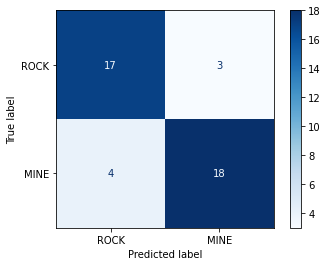

In [48]:
ab.fit(x_train, y_train)
ab_pred = ab.predict(x_test)

print('training score: {:.4f}'.format(ab.score(x_train, y_train)))
print('test score: {:.4f}'.format(ab.score(x_test, y_test)))

disp = plot_confusion_matrix(ab, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [49]:
#Summary

print('Ada Boost (AB)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, ab_pred, target_names=target_names))

print('--'*30)
ab_accuracy = (accuracy_score(y_test, ab_pred))
print('Accuracy=', ab_accuracy, '%')

Ada Boost (AB)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.81      0.85      0.83        20
        Mine       0.86      0.82      0.84        22

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42

------------------------------------------------------------
Accuracy= 0.8333333333333334 %


## 9. XGBoost Classifier 

training score: 1.0000
test score: 0.8571
[[17  3]
 [ 3 19]]


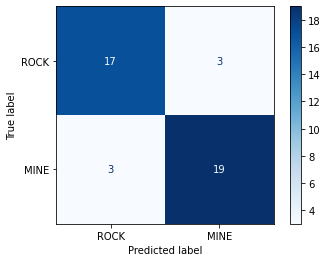

In [50]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

print('training score: {:.4f}'.format(xgb.score(X_train, Y_train)))
print('test score: {:.4f}'.format(xgb.score(X_test, Y_test)))

disp = plot_confusion_matrix(xgb, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.8571
[[17  3]
 [ 3 19]]


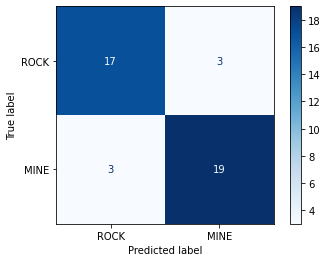

In [51]:
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print('training score: {:.4f}'.format(xgb.score(x_train, y_train)))
print('test score: {:.4f}'.format(xgb.score(x_test, y_test)))

disp = plot_confusion_matrix(xgb, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [52]:
#Summary

print('XGBoost Classifier (XGB)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, xgb_pred, target_names=target_names))

print('--'*30)
xgb_accuracy = (accuracy_score(y_test, xgb_pred))
print('Accuracy=', xgb_accuracy, '%')

XGBoost Classifier (XGB)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.85      0.85      0.85        20
        Mine       0.86      0.86      0.86        22

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42

------------------------------------------------------------
Accuracy= 0.8571428571428571 %


## 10. Gaussian Process Classifier 

training score: 1.0000
test score: 0.9286
[[18  2]
 [ 1 21]]


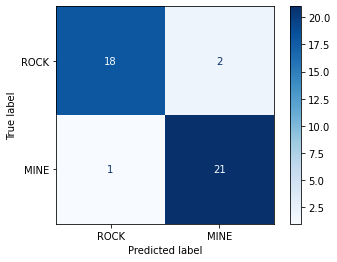

In [53]:
gp = GaussianProcessClassifier(1.0 * RBF(1.0))
gp.fit(X_train, Y_train)
Y_pred = gp.predict(X_test)

print('training score: {:.4f}'.format(gp.score(X_train, Y_train)))
print('test score: {:.4f}'.format(gp.score(X_test, Y_test)))

disp = plot_confusion_matrix(gp, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.8810
[[17  3]
 [ 2 20]]


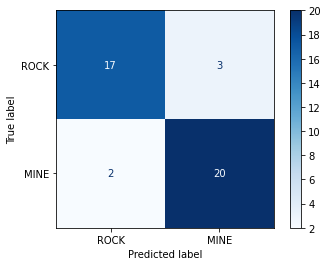

In [54]:
gp.fit(x_train, y_train)
gp_pred = gp.predict(x_test)

print('training score: {:.4f}'.format(gp.score(x_train, y_train)))
print('test score: {:.4f}'.format(gp.score(x_test, y_test)))

disp = plot_confusion_matrix(gp, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [55]:
#Summary

print('Gaussian Process Classifier (GP)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, gp_pred, target_names=target_names))

print('--'*30)
gp_accuracy = (accuracy_score(y_test, gp_pred))
print('Accuracy=', gp_accuracy, '%')

Gaussian Process Classifier (GP)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.89      0.85      0.87        20
        Mine       0.87      0.91      0.89        22

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

------------------------------------------------------------
Accuracy= 0.8809523809523809 %


## 11. Quadratic Discriminant Analysis 

training score: 1.0000
test score: 0.8571
[[16  4]
 [ 2 20]]


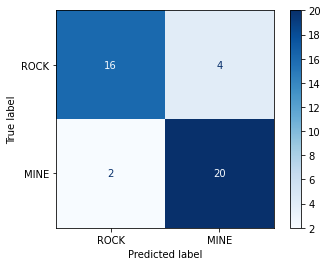

In [56]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)
Y_pred = qda.predict(X_test)

print('training score: {:.4f}'.format(qda.score(X_train, Y_train)))
print('test score: {:.4f}'.format(qda.score(X_test, Y_test)))

disp = plot_confusion_matrix(qda, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 1.0000
test score: 0.8571
[[16  4]
 [ 2 20]]


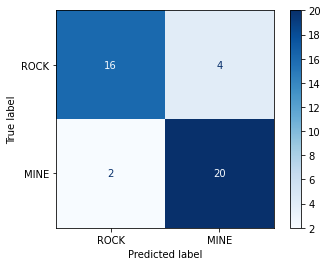

In [57]:
qda.fit(x_train, y_train)
qda_pred = qda.predict(x_test)

print('training score: {:.4f}'.format(qda.score(x_train, y_train)))
print('test score: {:.4f}'.format(qda.score(x_test, y_test)))

disp = plot_confusion_matrix(qda, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [58]:
#Summary

print('Quadratic Discriminant Analysis (QDA)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, qda_pred, target_names=target_names))

print('--'*30)
qda_accuracy = (accuracy_score(y_test, qda_pred))
print('Accuracy=', qda_accuracy, '%')

Quadratic Discriminant Analysis (QDA)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.89      0.80      0.84        20
        Mine       0.83      0.91      0.87        22

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.86        42
weighted avg       0.86      0.86      0.86        42

------------------------------------------------------------
Accuracy= 0.8571428571428571 %


## 12. Stochastic Gradient Descent Classifier 

training score: 0.8133
test score: 0.7143
[[17  3]
 [ 9 13]]


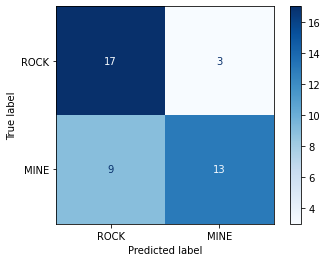

In [59]:
sgd = SGDClassifier(max_iter=1000, tol=10e-3,penalty='elasticnet')
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

print('training score: {:.4f}'.format(sgd.score(X_train, Y_train)))
print('test score: {:.4f}'.format(sgd.score(X_test, Y_test)))

disp = plot_confusion_matrix(sgd, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

training score: 0.8675
test score: 0.7381
[[16  4]
 [ 7 15]]


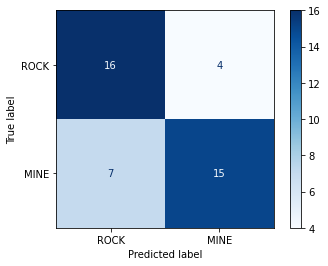

In [60]:
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)

print('training score: {:.4f}'.format(sgd.score(x_train, y_train)))
print('test score: {:.4f}'.format(sgd.score(x_test, y_test)))

disp = plot_confusion_matrix(sgd, x_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
print(disp.confusion_matrix)

In [61]:
#Summary

print('Stochastic Gradient Descent Classifier (SGD)')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, sgd_pred, target_names=target_names))

print('--'*30)
sgd_accuracy = (accuracy_score(y_test, sgd_pred))
print('Accuracy=', sgd_accuracy, '%')

Stochastic Gradient Descent Classifier (SGD)
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.70      0.80      0.74        20
        Mine       0.79      0.68      0.73        22

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42

------------------------------------------------------------
Accuracy= 0.7380952380952381 %


# Putting the results together

In [64]:
pred_dict = {'KNN' : knn_pred,'Logistic Regression' : lreg_pred,'SVC' : svc_pred,
           'Decision Tree' : dt_pred, 'Random Forest' : rf_pred,'Naive Bayes' : nb_pred,
           'MLP' : mlp_pred, 'AdaBoost': ab_pred,'XGBoost': xgb_pred, 'GaussianProcess': gp_pred,
            'QDA': qda_pred}

all_pred = pd.DataFrame(pred_dict)

final_pred = []

for j in range(all_pred.shape[0]):
    if all_pred.mean(axis=1)[j] <=0.5:
        final_pred.append(0) #rock
    else:
        final_pred.append(1) #mine
        
all_pred['final prediction'] = final_pred
all_pred['real value'] = y_test.values
all_pred.head(10)

,KNN,Logistic Regression,SVC,Decision Tree,Random Forest,Naive Bayes,MLP,AdaBoost,XGBoost,GaussianProcess,QDA,final prediction,real value
0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,1,1,1,0,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,1,1,0,1,1,1,1,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0


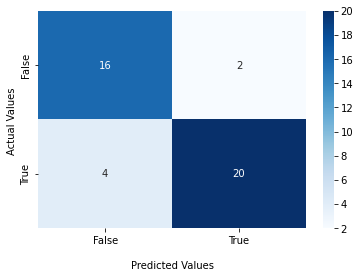

In [69]:
cm = confusion_matrix(final_pred, y_test)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

#ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [70]:
#Summary

print('All models together')


print('--'*30)
target_names = ['Rock', 'Mine']
print('Classification Report')
print('\n')
print(classification_report(y_test, final_pred, target_names=target_names))

print('--'*30)
sgd_accuracy = (accuracy_score(y_test, final_pred))
print('Accuracy=', sgd_accuracy, '%')

All models together
------------------------------------------------------------
Classification Report


              precision    recall  f1-score   support

        Rock       0.89      0.80      0.84        20
        Mine       0.83      0.91      0.87        22

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.86        42
weighted avg       0.86      0.86      0.86        42

------------------------------------------------------------
Accuracy= 0.8571428571428571 %


In [81]:
models= [knn,lreg,svc,dt,rf,nb,mlp,ab,xgb,gp,qda]
all_scores = pd.DataFrame(np.zeros((12,2)))
all_scores.columns = ["train score", "test score"]
all_scores.index = ['KNN', 'Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest',
       'Naive Bayes', 'MLP', 'AdaBoost', 'XGBoost', 'GaussianProcess', 'QDA', 'Final Pred']
train_scores=[]
test_scores=[]
for model in models:
    model.fit(x_train,y_train)
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))
#for final pred row
train_scores.append("-")
test_scores.append(accuracy_score(y_test, final_pred))
all_scores["train score"]= train_scores
all_scores["test score"]= test_scores
all_scores



,train score,test score
KNN,0.915663,0.833333
Logistic Regression,0.933735,0.809524
SVC,0.96988,0.880952
Decision Tree,1.0,0.761905
Random Forest,1.0,0.880952
Naive Bayes,0.740964,0.738095
MLP,1.0,0.904762
AdaBoost,1.0,0.833333
XGBoost,1.0,0.857143
GaussianProcess,1.0,0.880952


In [82]:
all_scores['test score'].sort_values(ascending=False)

MLP                    0.904762
SVC                    0.880952
Random Forest          0.880952
GaussianProcess        0.880952
XGBoost                0.857143
QDA                    0.857143
Final Pred             0.857143
KNN                    0.833333
AdaBoost               0.833333
Logistic Regression    0.809524
Decision Tree          0.761905
Naive Bayes            0.738095
Name: test score, dtype: float64

In [86]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers

# Instantiate the machine learning classifiers
knn_model = KNeighborsClassifier()
log_model = LogisticRegression()
svc_model = SVC()
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
mlp_model = MLPClassifier()
ada_model = AdaBoostClassifier()
xgb_model = GradientBoostingClassifier()
gpc_model = GaussianProcessClassifier()
qda_model = QuadraticDiscriminantAnalysis()


# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    knn = cross_validate(knn_model, x, y, cv=folds, scoring=scoring)
    log = cross_validate(log_model, x, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, x, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, x, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, x, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, x, y, cv=folds, scoring=scoring)
    mlp = cross_validate(mlp_model, x, y, cv=folds, scoring=scoring)
    ada = cross_validate(ada_model, x, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, x, y, cv=folds, scoring=scoring)
    gpc = cross_validate(gpc_model, x, y, cv=folds, scoring=scoring)
    qda = cross_validate(qda_model, x, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({ 'KNN': [knn['test_accuracy'].mean(),
                                                knn['test_precision'].mean(),
                                                knn['test_recall'].mean(),
                                                knn['test_f1_score'].mean()],
                                        
                                        'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                       "MLP": [mlp['test_accuracy'].mean(),
                                                mlp['test_precision'].mean(),
                                                mlp['test_recall'].mean(),
                                                mlp['test_f1_score'].mean()],
                                       "Ada Boost": [ada['test_accuracy'].mean(),
                                                    ada['test_precision'].mean(),
                                                    ada['test_recall'].mean(),
                                                    ada['test_f1_score'].mean()],
                                       "XGBoost": [xgb['test_accuracy'].mean(),
                                                    xgb['test_precision'].mean(),
                                                    xgb['test_recall'].mean(),
                                                    xgb['test_f1_score'].mean()],
                                       "Gaussian Process": [gpc['test_accuracy'].mean(),
                                                    gpc['test_precision'].mean(),
                                                    gpc['test_recall'].mean(),
                                                    gpc['test_f1_score'].mean()],
                                       "QDA": [qda['test_accuracy'].mean(),
                                                    qda['test_precision'].mean(),
                                                    qda['test_recall'].mean(),
                                                    qda['test_f1_score'].mean()]},
                                       index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
                                      

    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(x, y, 5)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/an

,KNN,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,MLP,Ada Boost,XGBoost,Gaussian Process,QDA,Best Score
Accuracy,0.566783,0.634959,0.639257,0.621138,0.673519,0.623461,0.663763,0.745412,0.683275,0.591173,0.577700,Ada Boost
Precision,0.592234,0.667758,0.684554,0.634958,0.698788,0.707941,0.730815,0.799675,0.696032,0.646983,0.605573,Ada Boost
Recall,0.585771,0.629644,0.621344,0.631225,0.694071,0.494862,0.621739,0.721739,0.730040,0.576680,0.730435,QDA
F1 Score,0.587039,0.632971,0.643590,0.619473,0.689150,0.574036,0.662054,0.744981,0.701624,0.607187,0.651433,Ada Boost


In [89]:
#algorithm comparison with boxplots
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier()))
models.append(('Ada', AdaBoostClassifier()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(('GP', GaussianProcessClassifier()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))

results = []
names = []

for name, model in models:
    kfold = 5
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daniel/opt/an

In [90]:
for i in range(len(results)):
    print(names[i],results[i].mean())

KNN 0.5667828106852497
LR 0.634959349593496
SVM 0.6392566782810685
DT 0.6260162601626016
RF 0.7022067363530777
NB 0.6234610917537747
MLP 0.6448315911730547
Ada 0.7454123112659699
XGB 0.6976771196283391
GP 0.5911730545876887
QDA 0.5777003484320558


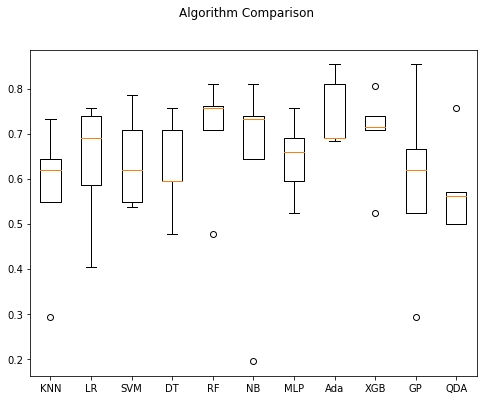

In [91]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()